# 04. PyTorch Custom Datasets

we've used some datasets with pytorch before.

But how do you get ypur own data into PyTorch?

One of the ways to do so is via : custom datasets.

## Domain libraries

Depending on what you're working oon , vision ,text,audio, recommendation, yu'll
want to lookk into each of the PyTorch domain libraries for existing data loading functions and customizable data loading functions




###0 .Importing PyTorch and Setting up device- agnostic code


In [ ]:
import torch
from torch import nn

#Note PyTorch 2.1.0+cu121 is required for this course

torch.__version__

'2.1.0+cu121'

In [ ]:
# Setup device -agnostic coden
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


### 1   GetData
Our dataset is a subset of the Food101 dataset.

Food101 starts 101 different classes of food and 1000 images per class (750 training , 250 testing ).

Our dataset Starts with 3 classes of food and only 10 % of the image

Why do this ?

When starting out ML projects , it's important to try things on a small scale and then increase the scale when necessary.

The whole point is to speed up hoe fast you can experiment.



In [ ]:
import requests
import zipfile
from pathlib import Path

# Setup Path to a data folder
data_path = Path("data/")
image_path = data_path/ "pizza_steak_sushi"

# if the Image folder doesn't exist , download it and prepare it ..

if image_path.is_dir():
  print(f"{image_path} directory already exists.... Skipping download")
else:
  print(f"{image_path} does not exist, creating one ....")
  image_path.mkdir(parents= True, exist_ok=True)


# Download pizza, steak and sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request= requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  print("Downloading pizza, steak ,sushi data ...  ")
  f.write (request.content)

# Unzip pizza ,steak ,sushi data

with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip","r") as zip_ref:
  print("Unzipping pizza ,steak,sushi data ....")
  zip_ref.extractall(image_path)


data/pizza_steak_sushi does not exist, creating one ....
Unzipping pizza ,steak,sushi data ....


In [ ]:
data_path/ "pizza_steak_sushi.zip"

PosixPath('data/pizza_steak_sushi.zip')

## 2. Becoming one with the data(data preparation and data exploation)



In [ ]:
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returing its contents."""
  for dirpath,dirnames,filenames in os.walk(dir_path):
      print(f"There are {len(dirnames)} directories and {len(filenames)} image in '{dirpath}'")



In [ ]:
walk_through_dir(image_path)

There are 2 directories and 0 image in 'data/pizza_steak_sushi'
There are 3 directories and 0 image in 'data/pizza_steak_sushi/test'
There are 0 directories and 25 image in 'data/pizza_steak_sushi/test/pizza'
There are 0 directories and 19 image in 'data/pizza_steak_sushi/test/steak'
There are 0 directories and 31 image in 'data/pizza_steak_sushi/test/sushi'
There are 3 directories and 0 image in 'data/pizza_steak_sushi/train'
There are 0 directories and 78 image in 'data/pizza_steak_sushi/train/pizza'
There are 0 directories and 75 image in 'data/pizza_steak_sushi/train/steak'
There are 0 directories and 72 image in 'data/pizza_steak_sushi/train/sushi'


In [ ]:
#Setup train and testing paths
train_dir= image_path / "train"
test_dir = image_path / "test"

train_dir ,test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

### 2.1 Visualizing and image

Let's Write some code to :
1. Get all of the image paths
2. Pick a random image path using python's random.choice()
3. Get the image class name using `pathlib.Path.parents.stem`
4. Since we're working with imagees , let's open the image with python's PIL
5. We'll then show the image and print metadata


data/pizza_steak_sushi/train/pizza/3699992.jpg
pizza
Random image path :data/pizza_steak_sushi/train/pizza/3699992.jpg
Image class : pizza
Image height :384
image width :512


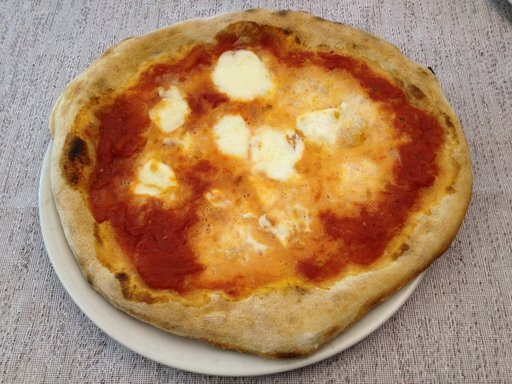

In [ ]:
import random
from PIL import Image

# Set seed
#random.seed(42)

#1.Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))

#2. pick a random image path
random_image_path= random.choice(image_path_list)
print(random_image_path)

#3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class= random_image_path.parent.stem
print(image_class)

#4. Open image
img = Image.open(random_image_path)


#5. print metadata
print(f"Random image path :{random_image_path}")
print(f"Image class : {image_class}")
print(f"Image height :{img.height}")
print(f"image width :{img.width}")
img

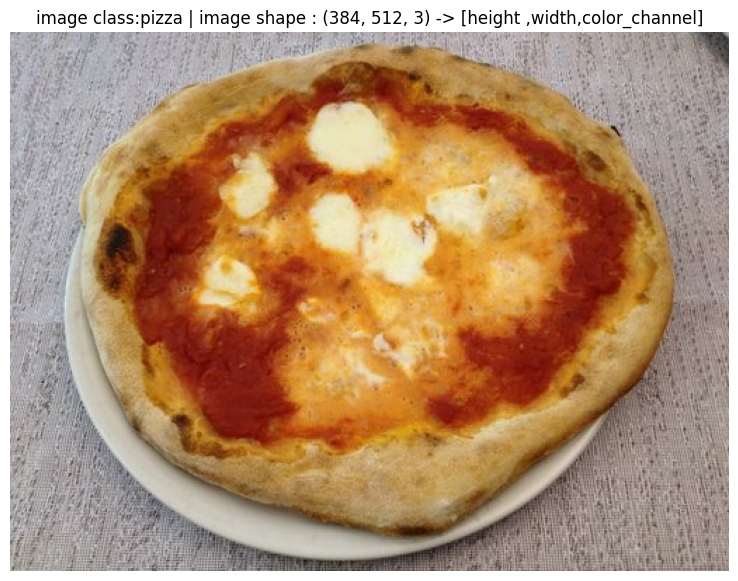

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# turn the image into an array
img_as_array = np.asarray(img)

# plot the image with matplotlib
plt.figure(figsize= (10,7))
plt.imshow(img_as_array)
plt.title(f"image class:{image_class} | image shape : {img_as_array.shape} -> [height ,width,color_channel]" )
plt.axis(False);


In [ ]:
img_as_array


array([[[162, 165, 174],
        [130, 133, 142],
        [157, 160, 169],
        ...,
        [149, 149, 149],
        [166, 166, 166],
        [169, 169, 169]],

       [[164, 167, 176],
        [133, 136, 145],
        [161, 164, 173],
        ...,
        [131, 131, 131],
        [157, 157, 157],
        [163, 163, 163]],

       [[180, 183, 192],
        [166, 169, 178],
        [173, 176, 185],
        ...,
        [ 97,  97,  97],
        [129, 129, 129],
        [153, 153, 153]],

       ...,

       [[196, 191, 185],
        [148, 143, 137],
        [ 90,  85,  79],
        ...,
        [162, 147, 140],
        [140, 125, 118],
        [164, 149, 142]],

       [[188, 183, 177],
        [133, 128, 122],
        [ 89,  84,  78],
        ...,
        [156, 141, 134],
        [147, 132, 125],
        [153, 138, 131]],

       [[183, 178, 172],
        [154, 149, 143],
        [155, 150, 144],
        ...,
        [151, 136, 129],
        [155, 140, 133],
        [142, 127, 120]]

##3.  Transforming  data

Befor e we can use our image data with PyTorch .

1.  Turn your target data into tensor (in our case , numerical representation of our images).
2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.Dataloader,` we'll call these `dataset` and`DataLoader`


https://pytorch.org/vision/stable/transforms.html#transforming-and-augmenting-images

In [ ]:
import torch
from  torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets,transforms



### 3.1 Transforming data with `torchvision.transforms`

Transforms help you get images ready to be used with a model /perform data augmentation

In [ ]:
# Write a transform for image
data_transform =  transforms.Compose([
    # Resize our images to 64*64
    transforms.Resize(size= (64,64)),

    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p= 0.5),

    # turn theimage into a torch.Tensor
    transforms.ToTensor()

])

In [ ]:
data_transform(img)

tensor([[[0.6627, 0.6667, 0.6510,  ..., 0.4118, 0.2980, 0.3137],
         [0.6784, 0.6706, 0.6627,  ..., 0.5020, 0.3569, 0.2784],
         [0.6667, 0.6784, 0.6667,  ..., 0.5843, 0.4588, 0.3216],
         ...,
         [0.6353, 0.6314, 0.6471,  ..., 0.6157, 0.6196, 0.6353],
         [0.6314, 0.6353, 0.6588,  ..., 0.6078, 0.6000, 0.6196],
         [0.6275, 0.6353, 0.6549,  ..., 0.5922, 0.5765, 0.6039]],

        [[0.6706, 0.6667, 0.6588,  ..., 0.4039, 0.2941, 0.3098],
         [0.6863, 0.6706, 0.6667,  ..., 0.4745, 0.3412, 0.2745],
         [0.6667, 0.6745, 0.6706,  ..., 0.5451, 0.4314, 0.3098],
         ...,
         [0.6157, 0.6078, 0.6196,  ..., 0.5608, 0.5647, 0.5804],
         [0.6118, 0.6157, 0.6353,  ..., 0.5569, 0.5451, 0.5608],
         [0.6078, 0.6118, 0.6314,  ..., 0.5412, 0.5176, 0.5451]],

        [[0.7059, 0.6980, 0.6824,  ..., 0.3961, 0.2902, 0.3059],
         [0.7216, 0.7020, 0.6980,  ..., 0.4549, 0.3333, 0.2627],
         [0.7020, 0.7059, 0.7020,  ..., 0.5294, 0.4196, 0.

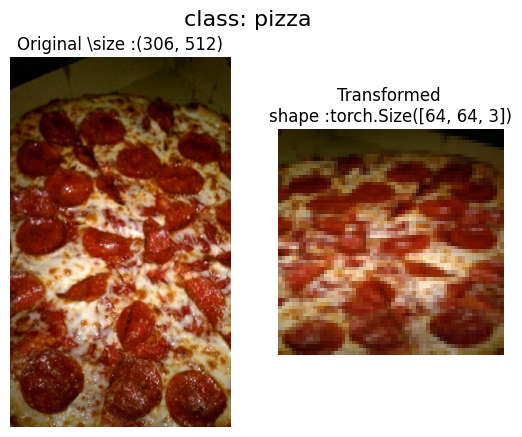

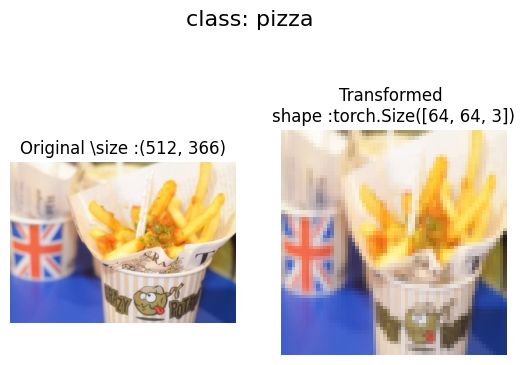

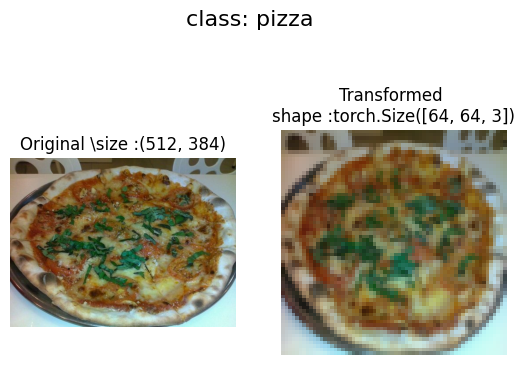

In [ ]:
def plot_transformed_images(image_paths,transform, n=3 ,seed =None):
  """Selects random images form a path of images and loads /transforms
  them then plots the original vs the transformed version.
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig ,ax= plt.subplots(nrows= 1,ncols= 2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \size :{f.size}")
      ax[0].axis(False)
      # transform and plot target image
      transformed_image = transform(f).permute(1,2,0) # Note we will need to change shape for matplotlib
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed \nshape :{transformed_image.shape}")
      ax[1].axis("off")

      fig.suptitle(f"class: {image_path.parent.stem}",fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform= data_transform,
                        n=3,
                        seed= None)



## 4. Option 1 : Loading image data using `ImageFolder`

We can load image classification data using `torchvision.datasets.imageFolder` - https://pytorch.org/vision/stable/generated/torchvision.datasets.ImageFolder.html#imagefolder



In [ ]:
# use image floder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root = train_dir,
                                  transform=data_transform, # transform fro the data
                                  target_transform=None )# a transformm fro the label/target

test_data=datasets.ImageFolder(root= test_dir,
                                transform=data_transform)

train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
train_dir,test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [ ]:
# GEt class names as list
class_names= train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [ ]:
# Get class names as dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
# Check the lengths of our data
len(train_data),len(test_data)

(225, 75)

In [ ]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [ ]:
# Index on the train_data Dataset to get a single image and label
img,label = train_data[0][0] ,train_data[0][1]
print(f"Image tensor :\n{img}")
print(f"image shape :{img.shape}")
print(f"Image label :{label}")
print(f"Label datatype:{type(label)}")

Image tensor :
tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0

Original shape :torch.Size([3, 64, 64]) -> [color_channels,height,width]
Image permute :torch.Size([64, 64, 3]) ->[height ,width.color_channel]


Text(0.5, 1.0, 'pizza')

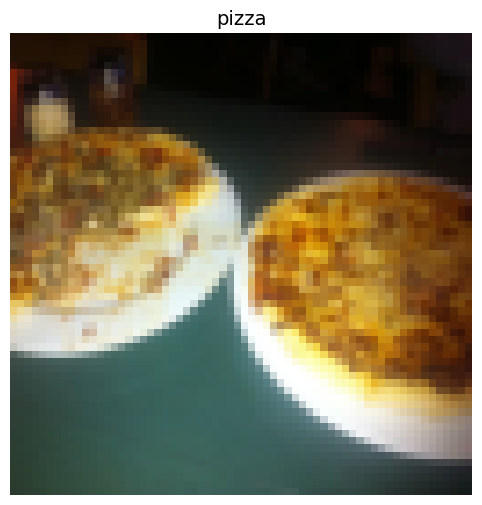

In [ ]:
 #Rearrange the order dimensions
 img_permute = img.permute(1,2,0)


 # print out different shapes
 print(f"Original shape :{img.shape} -> [color_channels,height,width]")
 print(f"Image permute :{img_permute.shape} ->[height ,width.color_channel]")

 # Plot the Image
 plt.figure(figsize= (10,6))
 plt.imshow(img_permute)
 plt.axis("off")
 plt.title(class_names[label],fontsize= 14)

## 4.1 Turn Loaded images into `DataLoader`'s

A `DataLoader` is going to help us turn our `dataset`'s into iterales and we can customise the batch_size so our model van see `batch_size`
images at a time .

In [ ]:
!nvidia- smi

/bin/bash: line 1: nvidia-: command not found


In [ ]:
# Turn train and test datasets into DataLoader's

from torch.utils.data import DataLoader
BATCH_SIZE= 1
train_dataloader  = DataLoader(dataset = train_data,
                               batch_size=BATCH_SIZE,
                               num_workers=1,
                               shuffle= True )

test_dataloader = DataLoader(dataset= test_data,\
                             batch_size= BATCH_SIZE,
                             num_workers= 1,
                             shuffle= False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7dbf117fdc90>,
 <torch.utils.data.dataloader.DataLoader at 0x7dbf117546a0>)

In [ ]:
len(train_dataloader),len(test_dataloader)

(225, 75)

In [ ]:
img,label= next(iter(train_dataloader))

# BAtch size will now be 1 , you can change the batch size if you like
print(f"Image shape :{img.shape} -> [batch_size,color channels,height,width]")
print(f"Label shape:{label.shape} ")

Image shape :torch.Size([1, 3, 64, 64]) -> [batch_size,color channels,height,width]
Label shape:torch.Size([1]) 


## 5 option 2: Loading Image Data with a custom `Dataset`

1.  Want to be able to load images from file
2.  Want to be able to get class name from the Dataset
3.  Want to be able to get classes  as dictionary from dataset
pros:
* Can Create a `Dataset ` out of almost anything
* Not limited to Pytorch pre - built `dataset` functions

Cons :
* Even though you could create `Dataset ` out of almost anything , it doesn't mean it will work
*Using a custom `Dataset` often results in us writting more code ,which could be prine to errors or performance issues.

All custom datasets in PyTorch,often subclass :- https://pytorch.org/vision/stable/datasets.html


In [ ]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List


In [ ]:
# instance of torchvision.dataset .ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

# 5.1 creating a helper function to get class name
We want a function to:
1. Get the class names using `os.scandir()` to traverse a target diretory (ideally the directpry  is in standard image classification format.)
2. Raise an error if the class names aren't found (if this happens ,there mights be something wrong with the directory structure)
3. Turn the class names into a dict and a list and return them.


In [ ]:
# Setup path fro target directory
target_directory = train_dir
print(f"Target dir :{target_directory}")

# Get the class names from the targetd dirctory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir :data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [ ]:
list(os.scandir(target_directory))

[<DirEntry 'pizza'>, <DirEntry 'steak'>, <DirEntry 'sushi'>]

In [ ]:
def find_classes(directory:str ) -> Tuple[list[str],Dict[str,int]]:
  """ Finds the class folder names in a target directory """
  #1.  Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())

  # 2. Raise an error if class names cloud not be found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}.... please check file structure  ")

  # Create a directory of index labels (computer prefer number rather than string as labels )
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes ,class_to_idx

In [ ]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom `Dataset` to replicate `imageFolder`
To create our own custom dataset, we want to:

1. Subclass `torch.utls.data.Dataset`
2. Init our subclass with a  target directory (the directory we'd like to get data from) as well as a transform if we'd like to transform our data.
3. create several  attributes:
     * paths - paths of our images
     * Transform - the transform we'd like to use
     * classes- a list of the target classes
     * class_to_dix - a dict of the target classes mapped to integer labels
4. Create a function to `load_images()`, this function will open an image
5. Overwrite the `__len()__` method to return the lenght of our dataset
6. overwrite the `__getitem()__`method to return a given sample when passed an index
   

In [ ]:
# Write a custom dataset class
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
  #2. Initialize our custom dataset
  def __init__(self,
               targ_dir:str,
               transform:None):
    #3. Create class attributes
    #Get all of the image paths
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    #Setup transform
    self.transform = transform
    #Create classes and class_to_idx attributes
    self.classes,self.class_to_idx = find_classes(targ_dir)
  # 4. Create a function to load images
  def load_image(self,index:int)-> Image.Image:
    "Open an image via a path  and returns it."
    image_path  = self.paths[index]
    return Image.open(image_path)

  # 5. Overwrite __len()
  def __len__(self) -> int :
    "Returns the total number of samples."
    return len(self.paths)

  # 6. overwrite __getitem__() method to return a paricular sample
  def __getitem__(self,index:int) -> Tuple[torch.tensor,int]:
    "Returns one sample of data, data and label (x,y)"
    img = self.load_image(index)
    class_name= self.paths[index].parent.name  # expects path in format : data_folder/class_name/image.jpg
    class_idx= self.class_to_idx

    # Transform if necessary
    if self.transform:
      return self.transform(img),class_idx # return data , label(x,y)
    else:
      return img ,class_idx # return untransformed image and label


In [ ]:
img,label = train_data[0]
img ,label

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

In [ ]:
# Create a transform
from torchvision import transforms

train_transforms = transforms.Compose([transforms.Resize(size= (64,64)),
                                      transforms.RandomHorizontalFlip(p= 0.5),
                                      transforms.ToTensor()])

test_transforms = transforms.Compose([transforms.Resize(size= (64,64)),
                                      transforms.ToTensor()])

In [ ]:
train_transforms,test_transforms

(Compose(
     Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
     RandomHorizontalFlip(p=0.5)
     ToTensor()
 ),
 Compose(
     Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
     ToTensor()
 ))

In [ ]:
# Test out ImageFolderCustom
train_data_custom = ImageFolderCustom(targ_dir = train_dir,
                                      transform= train_transforms)
test_data_custom = ImageFolderCustom(targ_dir = test_dir,
                                     transform=test_transforms)

In [ ]:
train_data_custom,test_data_custom

(<__main__.ImageFolderCustom at 0x7dbf11640730>,
 <__main__.ImageFolderCustom at 0x7dbf117ffd30>)

In [ ]:
len(train_data), len(train_data_custom)

(225, 225)

In [ ]:
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [ ]:
train_data_custom.class_to_idx

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
# Check fro equality between original ImageFolder Dataset and ImageFolderCustomDataset

print(train_data_custom.classes == train_data.classes)
print(test_data_custom.classes== test_data.classes)

True
True


### 5.3 Create a function to display random images

1. Take in a `Dataset` and a number of other parameters such as class names and how many images to visualize.
2. To prevent the display getting out of hand , let's cap the number of images to see at 10.
3.  Set the random seed for reproducibility
4.  Get a list of random samples indexes form the target dataset .
5. Setup a matplotlib plot
6. Loop through the random sample index and plot them with matplotlib
7. Make sure the dimension of our  images line up with matplotlib (HWC)


In [ ]:
# 1. Create a function to take in a dataset
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes:List[str]= None,
                          n:int= 10 ,
                          display_shape:bool = True,
                          seed:int = None):
  # 2 Adjust display if n is too high
  if n > 10:
    n = 10
    display_shape = False
    print(f"For display , purposes , n shouldn't be larger than 10, setting to 10 and removing shape display ")

  # 3 set  the seed
  if seed:
    random.seed(seed)

  # 4. Get random sample indexes
  random_samples_idx = random.sample(range(len(dataset)), k= n)

  # 5. Setup Plot
  plt.figure(figsize= (16,8))

  # 6. Loop through random indexes and plot them with matplotlib
  for i,targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    # 7. Adjust tensor dimension for plotting
    targ_image_adjust= targ_image.permute(1,2,0) # [colour_channel , height , width] -> [height , width,colour_channel]

    # Plot adjusted samples
    plt.subplot(1,n,i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"Class :{classes[targ_label]}"
      if display_shape :
       title = title + f"\n shape :{targ_image_adjust.shape}"
    plt.title(title)


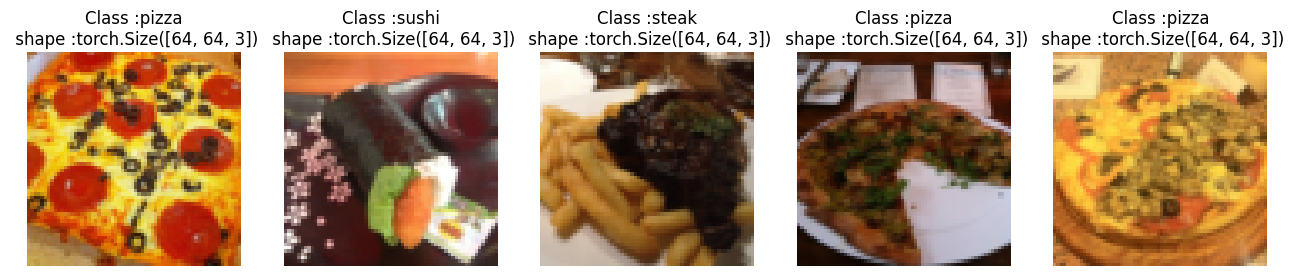

In [ ]:
# Display random images from the ImageFolder created Dataset
display_random_images(train_data,
                      n= 5,
                      classes = class_names,
                      seed = None)


For display , purposes , n shouldn't be larger than 10, setting to 10 and removing shape display 


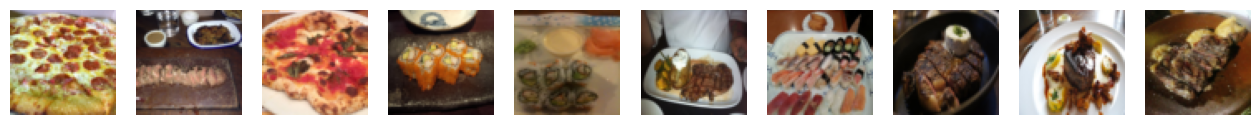

In [ ]:
# Display random images from from the ImageFolderCustom Dataset
display_random_images(train_data_custom,
                      n= 12,
                      classes= class_names,
                      seed= None)


### 5.4 Turn custom loaded images into `DataLoader's`


In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE= 32
NUM_WORKER = os.cpu_count()
train_dataloader_custom = DataLoader(dataset = train_data_custom,
                                     batch_size= BATCH_SIZE,
                                     num_workers=NUM_WORKER,
                                     shuffle= True)

test_dataloader_custom = DataLoader(dataset= test_data_custom,
                                    batch_size=BATCH_SIZE,
                                    num_workers= NUM_WORKER,
                                    shuffle= True)

train_dataloader_custom,test_dataloader_custom

(<torch.utils.data.dataloader.DataLoader at 0x7dbf117562c0>,
 <torch.utils.data.dataloader.DataLoader at 0x7dbf117568c0>)

In [ ]:
# Get Image and label from custom dataloader
img_custom, label_custom = next(iter(train_dataloader_custom))

# Print out the shapes
img_custom.shape,label_custom

(torch.Size([32, 3, 64, 64]),
 {'pizza': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0]),
  'steak': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1]),
  'sushi': tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
          2, 2, 2, 2, 2, 2, 2, 2])})

### 6. Other form of transforms (data auggmentaion)

Data augmentation  is the process of artificially adding diversity to your training data

In the case of image data ,this may mean applying various image transformation to the training images.

This practice hopefully results in a model that's more generalizable to unseen data.


Let's take a look at one particular type of data augmentation used to train PyTorch vision model to state of the art levels.....

The blogs:
https://pytorch.org/blog/how-to-train-state-of-the-art-models-using-torchvision-latest-primitives/


In [ ]:
# Let's Look at trivailaugment - https://pytorch.org/vision/0.15/auto_examples/plot_transforms.html#trivialaugmentwide

from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size= (224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()

])

test_transforms = transforms.Compose([transforms.Resize(size= (224,224)),
                                      transforms.ToTensor()
])

In [ ]:
# Get all image paths
img_path_list = list(image_path.glob("*/*/*.jpg"))
img_path_list[:10]

[PosixPath('data/pizza_steak_sushi/test/pizza/540882.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/3092704.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/344397.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2508636.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2236338.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/309892.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2218680.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2019408.jpg')]

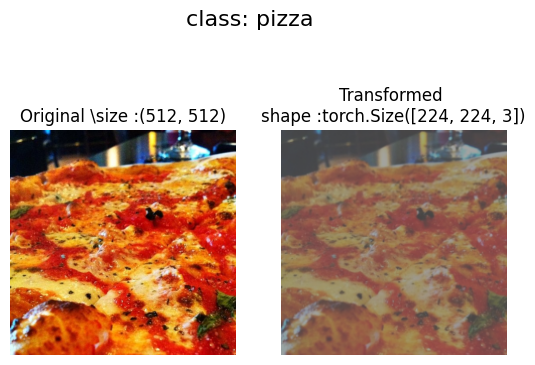

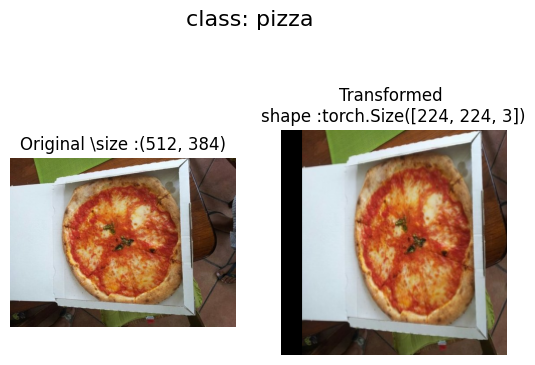

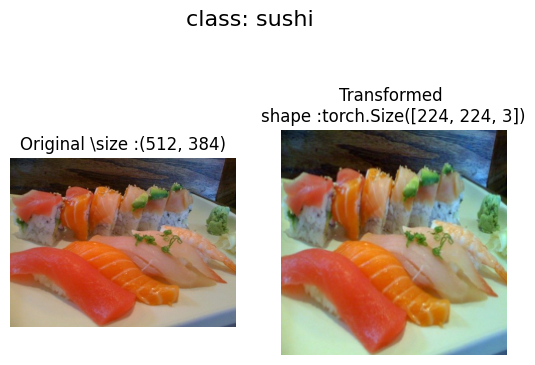

In [ ]:
# Plot random transformed images
plot_transformed_images(
    image_paths=img_path_list,
    transform=train_transform,
    n=3,
    seed= None
)

## 7. Model 0: TinyVGG  without data augmentaion

Let's replicate TinyVGG architecture from the CNN Explainer website : https://poloclub.github.io/cnn-explainer/

### 7.1 Create transfroms and loading data for Model 0


In [ ]:
# Create simple transform
simple_transfrom = transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [ ]:
# 1. Load and transfrom data
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root= train_dir,
                                         transform= simple_transfrom)
test_data_simple = datasets.ImageFolder(root = test_dir,
                                        transform= simple_transfrom)

# Turn the datasets into DataLoader
BATCH_SIZE= 32
NUM_WORKERS = os.cpu_count()

train_dataloader_simple= DataLoader(dataset = train_data_simple,
                                    batch_size = BATCH_SIZE,
                                    shuffle= True,
                                    num_workers= NUM_WORKERS)
test_dataloader_simple= DataLoader(dataset= test_data_simple,
                                   batch_size= BATCH_SIZE,
                                   shuffle= False,
                                   num_workers= NUM_WORKERS)

### 7.2 Create TinyVGG model class


In [ ]:
class TinyVGG(nn.Module):
  """
  Model  architecture copying TinyVGG from CNN explainer : https://poloclub.github.io/cnn-explainer/
  """
  def __init__(self,input_shape:int,
               hidden_units:int,
               output_shape :int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(
        in_channels=input_shape,
        out_channels= hidden_units,
        kernel_size= 3,
        stride = 1,
        padding = 0),
    nn.ReLU(),
    nn.Conv2d(in_channels=hidden_units,
              out_channels=hidden_units,
              kernel_size= 3,
              stride=1,
              padding= 0),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2,
                 stride= 2)  # default stride value is same as kernel_size
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(
        in_channels=hidden_units,
        out_channels= hidden_units,
        kernel_size= 3,
        stride = 1,
        padding = 0),
    nn.ReLU(),
    nn.Conv2d(in_channels=hidden_units,
              out_channels=hidden_units,
              kernel_size= 3,
              stride=1,
              padding= 0),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2,
                 stride= 2)  # default stride value is same as kernel_size

    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*13*13,
                  out_features=output_shape)
    )
  def forward(self,x):
    x= self.conv_block_1(x)
    #print(x.shape)
    x= self.conv_block_2(x)
   # print(x.shape)
    x= self.classifier(x)
    #print(x.shape)
    return x
     # return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [ ]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units= 10 ,
                  output_shape=len(class_names))

In [ ]:
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

### 7.3 Try a forward pass on a singel image (to test then model)



In [ ]:
# Get a single image batch
image_batch , label_batch = next(iter(train_dataloader_simple))
image_batch.shape,label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
# Try a forwrd pass
model_0(image_batch)

tensor([[ 2.0795e-02, -1.9510e-03,  9.5212e-03],
        [ 1.8440e-02,  2.4668e-03,  6.6609e-03],
        [ 1.7695e-02,  1.0282e-03,  9.4975e-03],
        [ 2.4446e-02, -3.3489e-03,  9.5877e-03],
        [ 1.9939e-02,  6.9131e-04,  1.0778e-02],
        [ 2.1281e-02,  2.0434e-03,  5.0046e-03],
        [ 2.0996e-02,  1.6415e-04,  1.2481e-02],
        [ 2.1566e-02, -1.9607e-03,  9.7175e-03],
        [ 2.4500e-02, -4.7904e-03,  8.5394e-03],
        [ 2.0239e-02, -4.7979e-04,  1.0907e-02],
        [ 2.2219e-02, -4.1816e-04,  9.8173e-03],
        [ 2.2318e-02, -2.1642e-03,  9.4428e-03],
        [ 2.1851e-02, -3.7225e-03,  8.3784e-03],
        [ 2.2881e-02, -1.7559e-03,  1.0299e-02],
        [ 2.1635e-02, -4.3995e-03,  9.4990e-03],
        [ 2.2101e-02, -4.1469e-03,  9.3904e-03],
        [ 2.1226e-02, -4.4215e-03,  1.1476e-02],
        [ 2.1698e-02, -2.7458e-03,  8.4966e-03],
        [ 1.9974e-02, -3.1665e-07,  8.4496e-03],
        [ 1.8308e-02,  1.6378e-03,  8.5491e-03],
        [ 2.0768e-02

#### 7.4 Use `trochinfo` to get an idea of the shapes going through our model

In [ ]:
# install torchinfo , import if it's availabe

try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_0,input_size= [1,3,64,64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 30, 30]           --
│    └─Conv2d: 2-1                       [1, 10, 62, 62]           280
│    └─ReLU: 2-2                         [1, 10, 62, 62]           --
│    └─Conv2d: 2-3                       [1, 10, 60, 60]           910
│    └─ReLU: 2-4                         [1, 10, 60, 60]           --
│    └─MaxPool2d: 2-5                    [1, 10, 30, 30]           --
├─Sequential: 1-2                        [1, 10, 13, 13]           --
│    └─Conv2d: 2-6                       [1, 10, 28, 28]           910
│    └─ReLU: 2-7                         [1, 10, 28, 28]           --
│    └─Conv2d: 2-8                       [1, 10, 26, 26]           910
│    └─ReLU: 2-9                         [1, 10, 26, 26]           --
│    └─MaxPool2d: 2-10                   [1, 10, 13, 13]           --
├─Sequentia

## 7.5 Create train and test loops functions
* `train_step()` - takes in a model and dataloader and trains the model on the dataloader.
* `test_step()` - takes in a model and dataloader and evaluates the model oon the dataloader.


In [ ]:
# Create train_step()
def train_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device= device):
  # put the model in train model
  model.train()

  # Setup train loss and train accuracy values
  train_loss,train_acc =0,0

  # Loop through data loader data batches
  for batch, (X,y) in enumerate(dataloader):
    X,y = X.to(device),y.to(device)

    # 1. Forward pass
    y_pred= model(X) # output model logits

    # 2. Calculate the loss
    loss = loss_fn(y_pred,y)
    train_loss += loss.item()

    #3.Optimizer  zero grad
    optimizer.zero_grad()

    #4. Loss Backward
    loss.backward()

    #5.Optimizer step
    optimizer.step()

    # Calculate accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred,dim = 1),dim= 1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss/len(dataloader)
    train_acc = train_acc/len(dataloader)
    return train_loss, train_acc


In [ ]:
# create a test step

def test_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
            ):
  # Put model ini eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss,test_acc =0,0

  #Turn on inference mode
  with torch.inference_mode():
    # Loop throught DataLoader batches
    for batch , (X,y) in enumerate(dataloader):
      # Send data to the target device
      X,y = X.to(device),y.to(device)

      # 1. Forward Pass
      test_pred_logits = model(X)

      # Calculate the loss
      loss = loss_fn(test_pred_logits,y)
      test_loss += loss.item()

      # Calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += (test_pred_labels ==y).sum().item()/len(test_pred_labels)

    # Adjust metrics to get average loss ad accuracy per batch
    test_loss = test_loss/len(dataloader)
    test_acc = test_acc/len(dataloader)
    return test_loss , test_acc


### 7.6 creating a `train()` function to combine `train_step()` and `test_step()`

In [ ]:
from tqdm.auto import tqdm

# 1. Create a train function that takes in various model parameters +optimizer + dataloader +loss function

def train(model:torch.nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          optimizer:torch.optim.Optimizer,
          loss_fn:torch.nn.Module= nn.CrossEntropyLoss(),
          epochs:int=5,
          device= device):
  #2. Create empty results dictionary
  results = {"train_loss":[],
             "train_acc":[],
             "test_loss":[],
             "test_acc":[]}
  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer = optimizer,
                                      )
    test_loss,test_acc= test_step(model= model,
                                  dataloader= test_dataloader,
                                  loss_fn = loss_fn,
                                  )
    # 4. print out what's happening
    print(f"Epoch:{epoch} | Train loss {train_loss:.5f}|train_acc:{train_acc:.4f} | Test loss:{test_loss:.4f} | Test acc:{test_acc:.4f}")
    # 5 update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # 6. Return the filled results at the epochs
  return results



###7.7 Train and evalute model 0


In [ ]:
# Set random seeds
#torch.manual_seed(42)
#torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape = 3,
                  hidden_units = 10,
                  output_shape = len(train_data.classes)).to(device)

# Setup loss function and output
loss_fn= nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params= model_0.parameters(),
                             lr= 0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model= model_0,
                        train_dataloader= train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer= optimizer ,
                        loss_fn = loss_fn,
                        epochs=NUM_EPOCHS,
                        )

# End the timer and prinit out how long it took
end_time = timer()
print(f"Total training time:{end_time - start_time:.3f} seconds")




  0%|          | 0/5 [00:00<?, ?it/s]

Epoch:0 | Train loss 0.13700|train_acc:0.0547 | Test loss:1.1051 | Test acc:0.1979
Epoch:1 | Train loss 0.13793|train_acc:0.0352 | Test loss:1.0992 | Test acc:0.1979
Epoch:2 | Train loss 0.13756|train_acc:0.0547 | Test loss:1.1045 | Test acc:0.1979
Epoch:3 | Train loss 0.13690|train_acc:0.0469 | Test loss:1.1093 | Test acc:0.1979
Epoch:4 | Train loss 0.13963|train_acc:0.0195 | Test loss:1.1094 | Test acc:0.1979
Total training time:6.821 seconds


In [ ]:
model_0_results

{'train_loss': [0.13700221478939056,
  0.13793231546878815,
  0.13755902647972107,
  0.13690252602100372,
  0.13963422179222107],
 'train_acc': [0.0546875, 0.03515625, 0.0546875, 0.046875, 0.01953125],
 'test_loss': [1.105140209197998,
  1.099225362141927,
  1.1044554710388184,
  1.1092687050501506,
  1.1093531052271526],
 'test_acc': [0.19791666666666666,
  0.19791666666666666,
  0.19791666666666666,
  0.19791666666666666,
  0.19791666666666666]}

### 7.8 plot the loss curves of model 0

A **Loss curve ** is a way of tracking your model's progress over time.

A good guide for different loss curves can be seen here : https://developers.google.com/machine-learning/testing-debugging/metrics/interpretic


In [ ]:
# Get the model_0 results keys
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [ ]:
def plot_loss_curves(results:dict[str,list[float]]):
  """plots training curves of a results dictionary."""
  # Get the loss values of the results dictionary (training and test)
  loss = results["train_loss"]
  test_loss = results["test_loss"]

  # Get the accuracy values of the results dictionary (training and test)
  accuracy= results["train_acc"]
  test_accuracy = results["test_acc"]

  #figure out hoe mnay epochs there were
  epochs = range(len(results["train_loss"]))

  # Setup a plot
  plt.figure(figsize= (15,7))

  # Plot the loss
  plt.subplot(1,2,1)
  plt.plot(epochs,loss,label= "train_loss")
  plt.plot(epochs,test_loss, label= "test_loss")
  plt.title("loss")
  plt.xlabel("Epochs")
  plt.legend()

  # plot accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs,accuracy,label= "train_accuracy")
  plt.plot(epochs,test_accuracy,label= "test_accuracy")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()


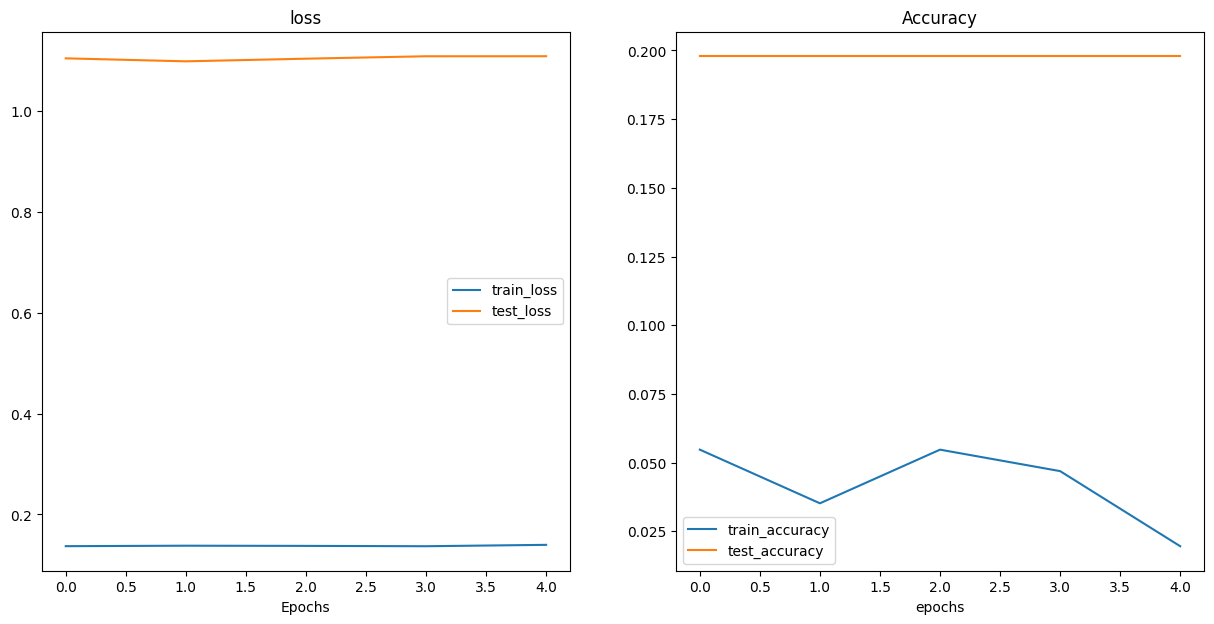

In [ ]:
plot_loss_curves(model_0_results)

### 8. what should an ideal loss curve look like ?
https://developers.google.com/machine-learning/testing-debugging/metrics/interpretic

A loss curve is one of the most helpful way ro troubleshoot a model


### 9 Model 1: TiinyVGG with Data Augmentation

Now let's try another modellinig experiment this time using the same model as before with some data augmentation

In [ ]:
## 9.1 Create transform transfrom wiith TrivialAugmment

from torchvision import transforms
train_transform_trivial_augment = transforms.Compose([transforms.Resize(size= (64,64)),
                                              transforms.TrivialAugmentWide(num_magnitude_bins=31),
                                              transforms.ToTensor()])


test_transforms_simple = transforms.Compose([transforms.Resize(size= (64,64)),
                                             transforms.ToTensor()])




###  9.2 Create train and test Dataset's and DataLoader's with data augmentation


In [ ]:
# Turn image folders into Datasets
from torchvision import datasets

train_data_augmented = datasets.ImageFolder(root = train_dir,
                                            transform = train_transform_trivial_augment)

test_data_simple = datasets.ImageFolder(root = test_dir,
                                        transform= test_transforms_simple)


In [ ]:
# Turn our Datasets into DataLoader

import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

torch.manual_seed(42)
train_dataloader_augmented = DataLoader(train_data_augmented,
                                        batch_size = BATCH_SIZE,
                                        shuffle = True,
                                        num_workers = NUM_WORKERS)
test_dataloader_simple = DataLoader(test_dataloader_simple,
                                    batch_size =BATCH_SIZE,
                                    shuffle = False,
                                    num_workers = NUM_WORKERS)


## 9.3 Construct and train model 1

This time we'll be using the same modelarchitecture except this time we've augmented training data


In [ ]:
# Create model 1 and send it to the target device
torch.manual_seed(42)
model_1= TinyVGG(input_shape=3,
                 hidden_units=10,
                 output_shape = len(train_data_augmented.classes)).to(device)

model_1

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=3, bias=True)
  )
)

Wonderful! Now we've model and dataloader let's create a loss function and optimizer and claaa upon our `train` evaluate our model


In [ ]:
# Set randoom seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the numbers of Epochs
NUM_EPOCHS = 5

# SetUp Loss Function
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params= model_1.parameters(),
                             lr =0.001)
# Start the timer
from timeit import default_timer as time
start_time = timer()

# Train model 1
model_1_results = train(model=model_1,
                        train_dataloader = train_dataloader_augmented,
                        test_dataloader= test_dataloader_simple,
                        optimizer = optimizer,
                        loss_fn = loss_fn,
                        epochs = NUM_EPOCHS,
                        device = device)


# End the timer and print out how long it took
end_timer= timer()
print(f"Total training time for model_1 :{end_time - start_time:.3f} second")


  0%|          | 0/5 [00:00<?, ?it/s]

TypeError: Caught TypeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/fetch.py", line 51, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/fetch.py", line 51, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
TypeError: 'DataLoader' object is not subscriptable


In [ ]:
model_1_results

###9.4 plot the loss curves of model 1

A Loss curve help you evaluate your models performance overtime

In [ ]:
plot_loss_curves(model_1_results)

### 10. compare modl results

After evaluatiing our modelling experiments on their own, it,s important to compare them to each other .

There's a few different ways to do this:
1.  Hard Coding (what we're doing )
2.  PyTorch + Tensorboard :https://pytorch.org/docs/stable/tensorboard.html#module-torch.utils.tensorboard
3.  Weight & Biases :https://wandb.ai/site
4.  MLFLOW :-https://mlflow.org/

In [ ]:
import pandas as pd
model_0_df = pd.DataFrame(model_0_results)
model_1_df = pd.DataFrame(model_1_results)
model_0_df

NameError: name 'model_1_results' is not defined

NameError: name 'model_1_df' is not defined

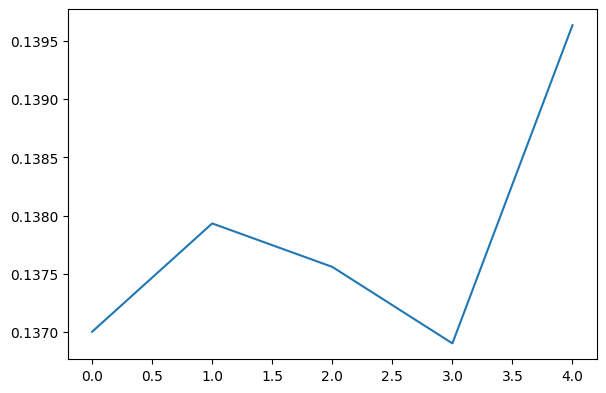

In [ ]:
### SetUp a plot
plt.figure(figsize= (15,10))

# Get number of epochs
epochs = range(len(model_0_df))

# plot train loss
plt.subplot(2,2,1)
plt.plot(epochs, model_0_df["train_loss"],label = "model 0")
plt.plot(epochs, model_1_df["train_loss"],label= "model 1")
plt.title("train loss")
plt.xlabel("Epochs")
plt.legend()


# plot test loss
plt.subplot(2,2,2)
plt.plot(epochs, model_0_df["test_loss"],label = "model 0")
plt.plot(epochs, model_1_df["test_loss"],label= "model 1")
plt.title("test loss")
plt.xlabel("Epochs")
plt.legend()



# plot train accuracy
plt.subplot(2,2,3)
plt.plot(epochs, model_0_df["train_acc"],label = "model 0")
plt.plot(epochs, model_1_df["train_acc"],label= "model 1")
plt.title("Train accuracy")
plt.xlabel("Epochs")
plt.legend()




# plot test accuracy
plt.subplot(2,2,4)
plt.plot(epochs, model_0_df["test_acc"],label = "model 0")
plt.plot(epochs, model_1_df["test_acc"],label= "model 1")
plt.title("test accuaracy")
plt.xlabel("Epochs")
plt.legend()

###11. making a predictions on a custom Image
Although we've trained a model on  custom data how do you make a sample /image that's not in either training or testing

In [ ]:
# Download custom image
import requests

# set custom image path
custom_image_path = data_path / "pizza.jpeg"
'''
# Download the image if it doesn't already exist
if not custom_image_path.is_file():
  with open(custom_image_path,"wb") as f:
    # When downloading from GitHub , need to use the "raw" file link
    request = requests.get("C:/Users/Chandan Kundan/Downloads/pizza.jpeg")
    print(f"Downloading {custom_image_path} .....")
    f.write(request.content)
else:
  print(f"{custom_image_path} already exists , skipping download....")
'''

'\n# Download the image if it doesn\'t already exist\nif not custom_image_path.is_file():\n  with open(custom_image_path,"wb") as f:\n    # When downloading from GitHub , need to use the "raw" file link\n    request = requests.get("C:/Users/Chandan Kundan/Downloads/pizza.jpeg")\n    print(f"Downloading {custom_image_path} .....")\n    f.write(request.content)\nelse:\n  print(f"{custom_image_path} already exists , skipping download....")\n'

In [ ]:
custom_image_path

PosixPath('data/pizza.jpeg')

### 11.1 loading in acustom image with PyTorch

We have to make sure our custom image is in the same forma as the data our model was trained on

*   In tensor form with datatype(torch float 32 )
*  Of shape 64 * 64 *3
*  On the right device

https://pytorch.org/vision/0.15/io.html

In [ ]:
import torchvision

# Read in custom image
custom_image_unit8 = torchvision.io.read_image(str(custom_image_path))
custom_image_unit8
print(f"Custom image tensor:\n{custom_image_unit8}")
print(f"Custom image shape : {custom_image_unit8.shape}")
print(f"Custom image datatype :{custom_image_unit8.dtype}")

RuntimeError: Expected a non empty file

In [ ]:
plt.imshow(custom_image_unit8.permute(1,2,0))

NameError: name 'custom_image_unit8' is not defined

###11.2 Making a prediction on a custom image with a trained PyTorch model


In [ ]:
# Try to make a prediction on an image in unit8 format
model_1.eval()
with torch.inference_mode():
  model_1(custom_image_unit8)

NameError: name 'custom_image_unit8' is not defined

In [ ]:
# Load in the custom image qand convert to torch.float32

custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)/255
custom_image

RuntimeError: Expected a non empty file

In [ ]:
# Try to make a prediction on an image in unit8 format
model_1.eval()
with torch.inference_mode():
  model_1(custom_image)

NameError: name 'custom_image' is not defined

In [ ]:
plt.imshow(custom_image.permute(1,2,0))

NameError: name 'custom_image' is not defined

In [ ]:
# Create transform pipeline to resize image
custom_image_transform= transforms.Compose([
    transforms.Resize(size= (64,64)),

])

# Transform target image
custom_image_transformed= custom_image_transform(custom_image)

# print out the shapes
print(f"Original shape :{custom_image.shape}")
print(f"Transfromed shape :{custom_image_transformed.shape }")


NameError: name 'custom_image' is not defined

In [ ]:
plt.imshow(custom_image_transformed.permute(1,2,0))

NameError: name 'custom_image_transformed' is not defined

In [ ]:
# This will error :no batch size
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed)

NameError: name 'custom_image_transformed' is not defined

In [ ]:
custom_image_transformed.shape, custom_image_transformed.unsqueeze(0).shape


NameError: name 'custom_image_transformed' is not defined

In [ ]:
model_1.eval()
with torch.inference_mode():
  custom_image_pred = model_1(custom_image_transformed.unsqueeze())
custom_image_pred

NameError: name 'custom_image_transformed' is not defined

In [ ]:
class_names

['pizza', 'steak', 'sushi']

Note to make a prediction on a custom image we had to:
* load the image and turn it into a tensor
* Make sure the image was the same datatype as the model (torch.float32)
* Make sure the image was the same shape as the data the model was trained om(3,64,64) with a batch size .....(1,3,64,64)
* Make sure the image was on the same device as our model

In [ ]:
# Convert logits -> prediction probabilities
custom_image_pred_probs = torch.softmax(custom_image_pred,dim= 1)
custom_image_pred_probs

NameError: name 'custom_image_pred' is not defined

In [ ]:
# Covert prediction probabilities -> prediction labels
custom_image_pred_labels = torch.argmax(custom_image_pred_probs,dim= 1)
custom_image_pred_labels

NameError: name 'custom_image_pred_probs' is not defined

In [ ]:
class_names[custom_image_pred_labels]

NameError: name 'custom_image_pred_labels' is not defined

###11.3 Putting custom image preediction together : building a function
Ideal outcome:

A function where we pass an image path to and have our model predict on that image and plot the image + prediction.


In [ ]:
def pred_and_plot_image(model:torch.nn.Module,
                        image_path:str,
                        class_names:List[str]=None,
                        transform= None,
                        device= device):
  """Make a prediction on a target image with a trained model and plots the image and prediction."""
  # Load in the image
  target_image = torchvision.io.read_image(str(image_path)).type(torch.float32)

  # Divide the image pixel values by 255 to get them between [0,1]
  target_image = target_image/255

  # transform if necessary
  if transform:
    target_image = transform(target_image)

  # Make sure the model is on  the target device
  model.to(device)

  # turn on eval/ inference mode and make a prediction
  model.eval()
  with torch.inference_mode():
    # Add an extra dimension to the image(this is the batch dimension ,e.g. our model will predict on batches of 1X image )
    target_image = target_image.unsqueeze(0)

    # Make a prediction on the image with an extra dimension
    target_image_pred = model(target_image_pred.to(device)) # make sure the target image is om the right device

  # convert logits -> prediction probabilities
  target_image_pred_probs = torch.softmax(target_image_pred,dim = 1)

  # convert prediction probabilities -> prediction labels
  target_image_pred_label = torch.argmax(target_image_pred_probs,dim= 1)

  # Plot the image alongside the prediction and prediction probability
  plt.imshow(target_image.squeeze().permute(1,2,0)) # remove batch dimension and rearrange
  if class_names:
    title= f"pred :{class_names[target_image_pred_label.cpu()]} | Prob:{target_image_pred_probs.max().cpu():.3f}"

  else:
    title= f"pred: {target_image_pred_label} | prob: {target_image_pred_probs.max().cpu():.3f}"
  plt.title(title)
  plt.axis(False)


In [ ]:
# Pred on our custom image
pred_and_plot_image(model= model_0,
                    image_path = custom_image_path,
                    class_names= class_names,
                    transform = custom_image_transform,
                    device= device)

RuntimeError: Unsupported image file. Only jpeg and png are currently supported.